In [ ]:
%cd /content/drive/'My Drive'/SSA/
!ls

/content/drive/My Drive/SSA
AirPassengers.csv  data_subjects_info.csv


In [ ]:
import numpy as np
from numpy import pi
import pandas as pd
import random
from numpy import linalg
import matplotlib.pyplot as plt
import math

Text(0, 0.5, '$F(t)$')

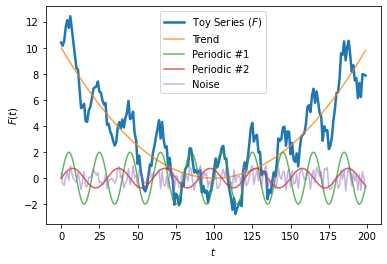

In [ ]:
N = 200 # The number of time 'moments' in our toy series
t = np.arange(0,N)
trend = 0.001 * (t - 100)**2
p1, p2 = 20, 30
periodic1 = 2 * np.sin(2*pi*t/p1)
periodic2 = 0.75 * np.sin(2*pi*t/p2)

np.random.seed(123) # So we generate the same noisy time series every time.
noise = 2 * (np.random.rand(N) - 0.5)
F = trend + periodic1 + periodic2 + noise

# Plot everything
plt.plot(t, F, lw=2.5)
plt.plot(t, trend, alpha=0.75)
plt.plot(t, periodic1, alpha=0.75)
plt.plot(t, periodic2, alpha=0.75)
plt.plot(t, noise, alpha=0.5)
plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$")

In [ ]:
# ts_ = pd.read_csv("data_subjects_info.csv") #Original timeseries
# ts_1 = ts_.copy()
# ts = np.array(ts_1['#Passengers'])
ts = F
ts

array([10.39293837, 10.14724643, 10.53832589, 11.57050247, 12.11440959,
       11.52073197, 12.41293382, 11.38258489, 10.34732573,  9.39656141,
        8.43587509,  8.31842405,  6.88641292,  5.37537429,  5.44590925,
        5.70099081,  4.36293666,  4.31681704,  5.1706933 ,  5.44926257,
        6.01928286,  6.84460519,  6.96258973,  7.02318959,  7.40970741,
        6.62139877,  6.54433172,  5.96272151,  5.64194612,  5.76505247,
        4.08420988,  4.16630212,  3.6152075 ,  3.29917515,  2.86290617,
        2.4990415 ,  2.75988197,  3.88363576,  4.30264095,  3.81993175,
        4.49742496,  3.8876294 ,  4.61498041,  5.00173889,  5.92666512,
        4.52591073,  4.62824779,  5.09310108,  3.4777018 ,  2.88746442,
        1.09173828,  1.72235523,  0.58865833, -0.0647894 , -0.81387775,
       -1.01627747, -0.68942723,  0.1527286 ,  1.0342907 ,  0.92787692,
        1.93862757,  2.46684086,  3.17442999,  3.77725103,  4.44015653,
        3.04090903,  4.2987711 ,  2.94025816,  2.33390785,  2.43

# 1. Trajectory Matrix



In [ ]:
#N
N = len(ts)
#L 2 <= L <= N/2
L = 70 #Window Length
#K Number of Columns in the Trajectory Matrix
K = N-L+1
print(f'Realization length(N):\t{N}\nWindow Length(L):\t{L}\nK:\t\t\t{K}')
#Trajectory Matrix
X = np.column_stack([ts[i:i+L] for i in range(K)])
print(f"Trajectory Matrix:\n{X}")

Realization length(N):	200
Window Length(L):	70
K:			131
Trajectory Matrix:
[[10.39293837 10.14724643 10.53832589 ...  3.31939929  1.96106648
   2.01166512]
 [10.14724643 10.53832589 11.57050247 ...  1.96106648  2.01166512
   0.22246266]
 [10.53832589 11.57050247 12.11440959 ...  2.01166512  0.22246266
   0.49066557]
 ...
 [ 2.94025816  2.33390785  2.43724029 ...  7.29680072  6.22234907
   7.97547484]
 [ 2.33390785  2.43724029  0.74094409 ...  6.22234907  7.97547484
   7.93341656]
 [ 2.43724029  0.74094409  1.55097828 ...  7.97547484  7.93341656
   7.8691161 ]]


# 2. SVD

In [ ]:
#U = left singular vectors
#V = Right singular vectors
#E(Sigma) = Singular Values
#d = Rank of the trajectory matrix
d = np.linalg.matrix_rank(X)
U,s,vh = np.linalg.svd(X)
E = np.diag(s)
V = np.transpose(vh)

In [ ]:
X_elem = np.array( [s[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
np.shape(X_elem[0])

(70, 131)

In [ ]:
for i in range(d):
    plt.matshow(X_elem[i])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
np.size(s)
s

array([221.67919434, 145.95016301,  99.0858951 ,  96.50223989,
        35.47823983,  33.87545774,  18.43591642,  10.79063762,
        10.67750861,  10.0019126 ,   9.96099996,   9.30184665,
         9.19642185,   8.78647293,   8.69438606,   8.39343956,
         8.31824927,   8.16497143,   8.10398169,   7.9080541 ,
         7.86729685,   7.80939007,   7.77791223,   7.63672609,
         7.61468142,   7.17432586,   7.15791688,   7.08125282,
         6.95648627,   6.75538694,   6.74814165,   6.60493656,
         6.49861426,   6.25627528,   6.17878585,   6.0917227 ,
         5.97745245,   5.85645535,   5.56373389,   5.44940906,
         5.3781421 ,   5.25789177,   5.24889198,   5.1996125 ,
         5.02582369,   4.82544723,   4.76238655,   4.66533541,
         4.56333732,   4.53178609,   4.45022138,   4.18033536,
         4.08511904,   3.97754722,   3.93818638,   3.78513569,
         3.76362583,   3.66612816,   3.57181945,   3.50343582,
         3.34172097,   3.1483624 ,   2.93589238,   2.78

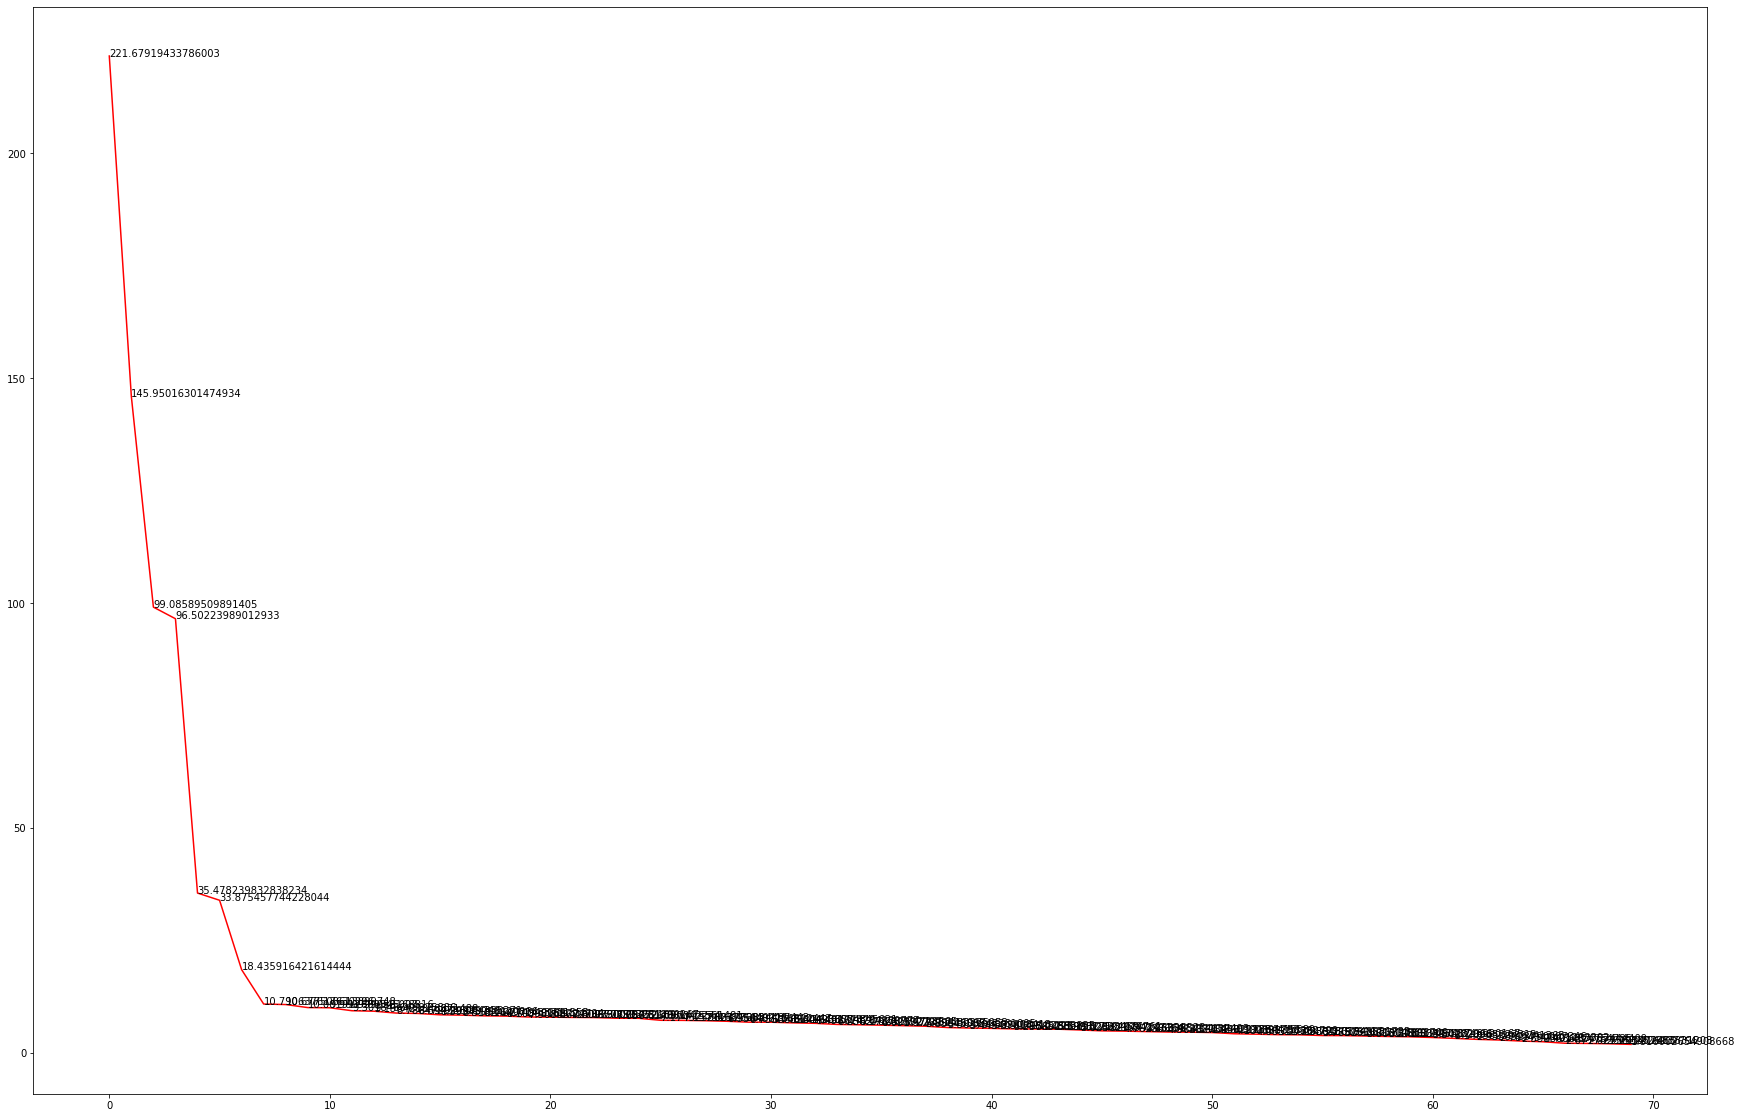

In [ ]:
plt.figure(figsize = (30,20))
plt.plot(range(len(s)),s,'red')
for a,b in zip(range(len(s)),s):
    plt.text(a,b,str(b))
plt.show()

In [ ]:
def X_to_TS(X):
    X_rev = np.fliplr(X)
    m,n = np.shape(X)
    x = np.array([X_rev.diagonal(i).mean() for i in range(-m+1, n)])
    return x[::-1]

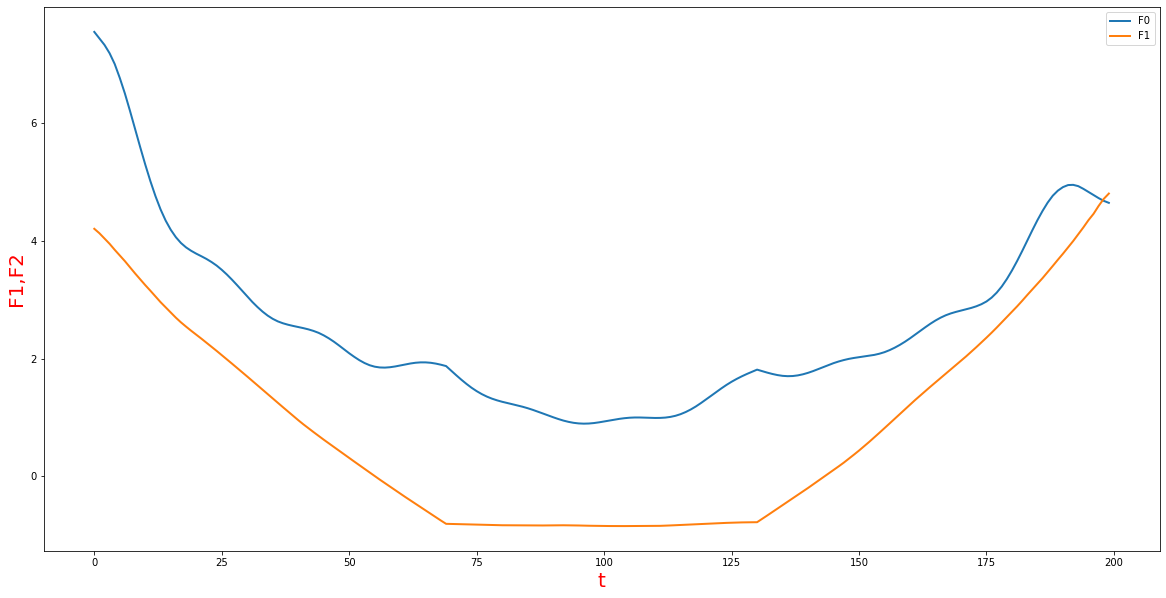

In [ ]:
#Trend
plt.figure(figsize= (20,10))
for i in [0,1]:
  F_i = X_to_TS(X_elem[i])
  plt.plot(t, F_i, lw=2, label = f'F{i}')
  plt.xlabel("t", fontsize = 20, color = 'r')
  plt.ylabel("F1,F2", fontsize = 20, color = 'r')
plt.legend()

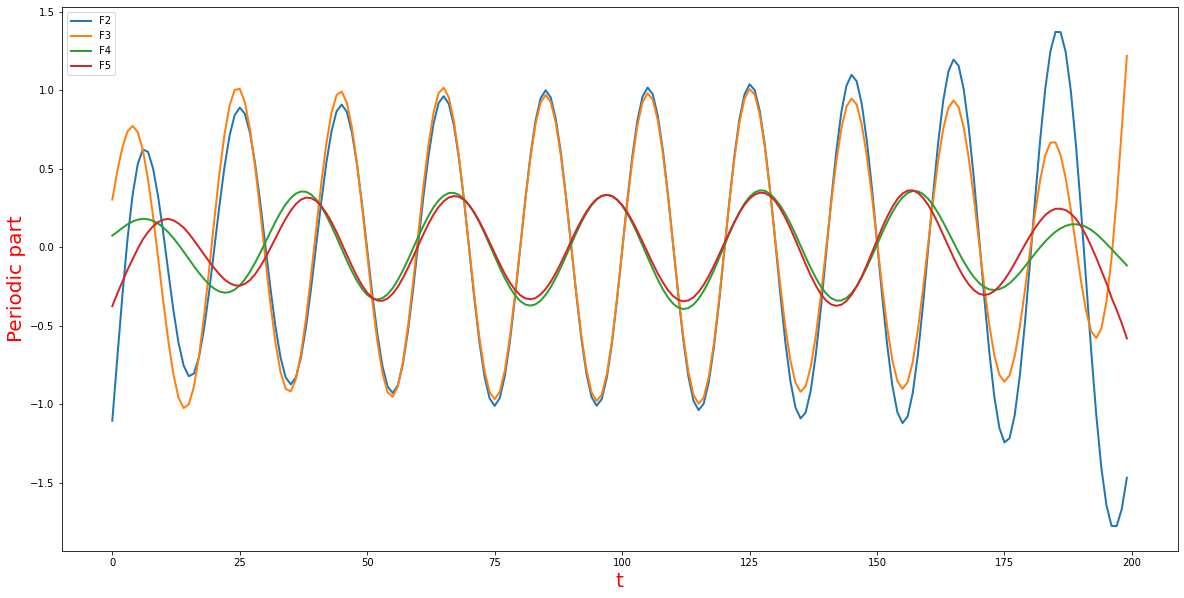

In [ ]:
#Periodic
plt.figure(figsize= (20,10))

for i in range(2,6):
  F_i = X_to_TS(X_elem[i])
  plt.plot(t, F_i, lw=2, label = f'F{i}')
  plt.xlabel("t", fontsize = 20, color = 'r')
  plt.ylabel("Periodic part", fontsize = 20, color = 'r')
plt.legend()

In [ ]:

# plt.figure(figsize= (20,10))
# for i in [6,7,8]:
#   F_i = X_to_TS(X_elem[i])
#   plt.plot(t, F_i, lw=2, label = f'F{i}')
#   plt.xlabel("t", fontsize = 20, color = 'r')
#   plt.ylabel("F1,F2", fontsize = 20, color = 'r')
# plt.legend()

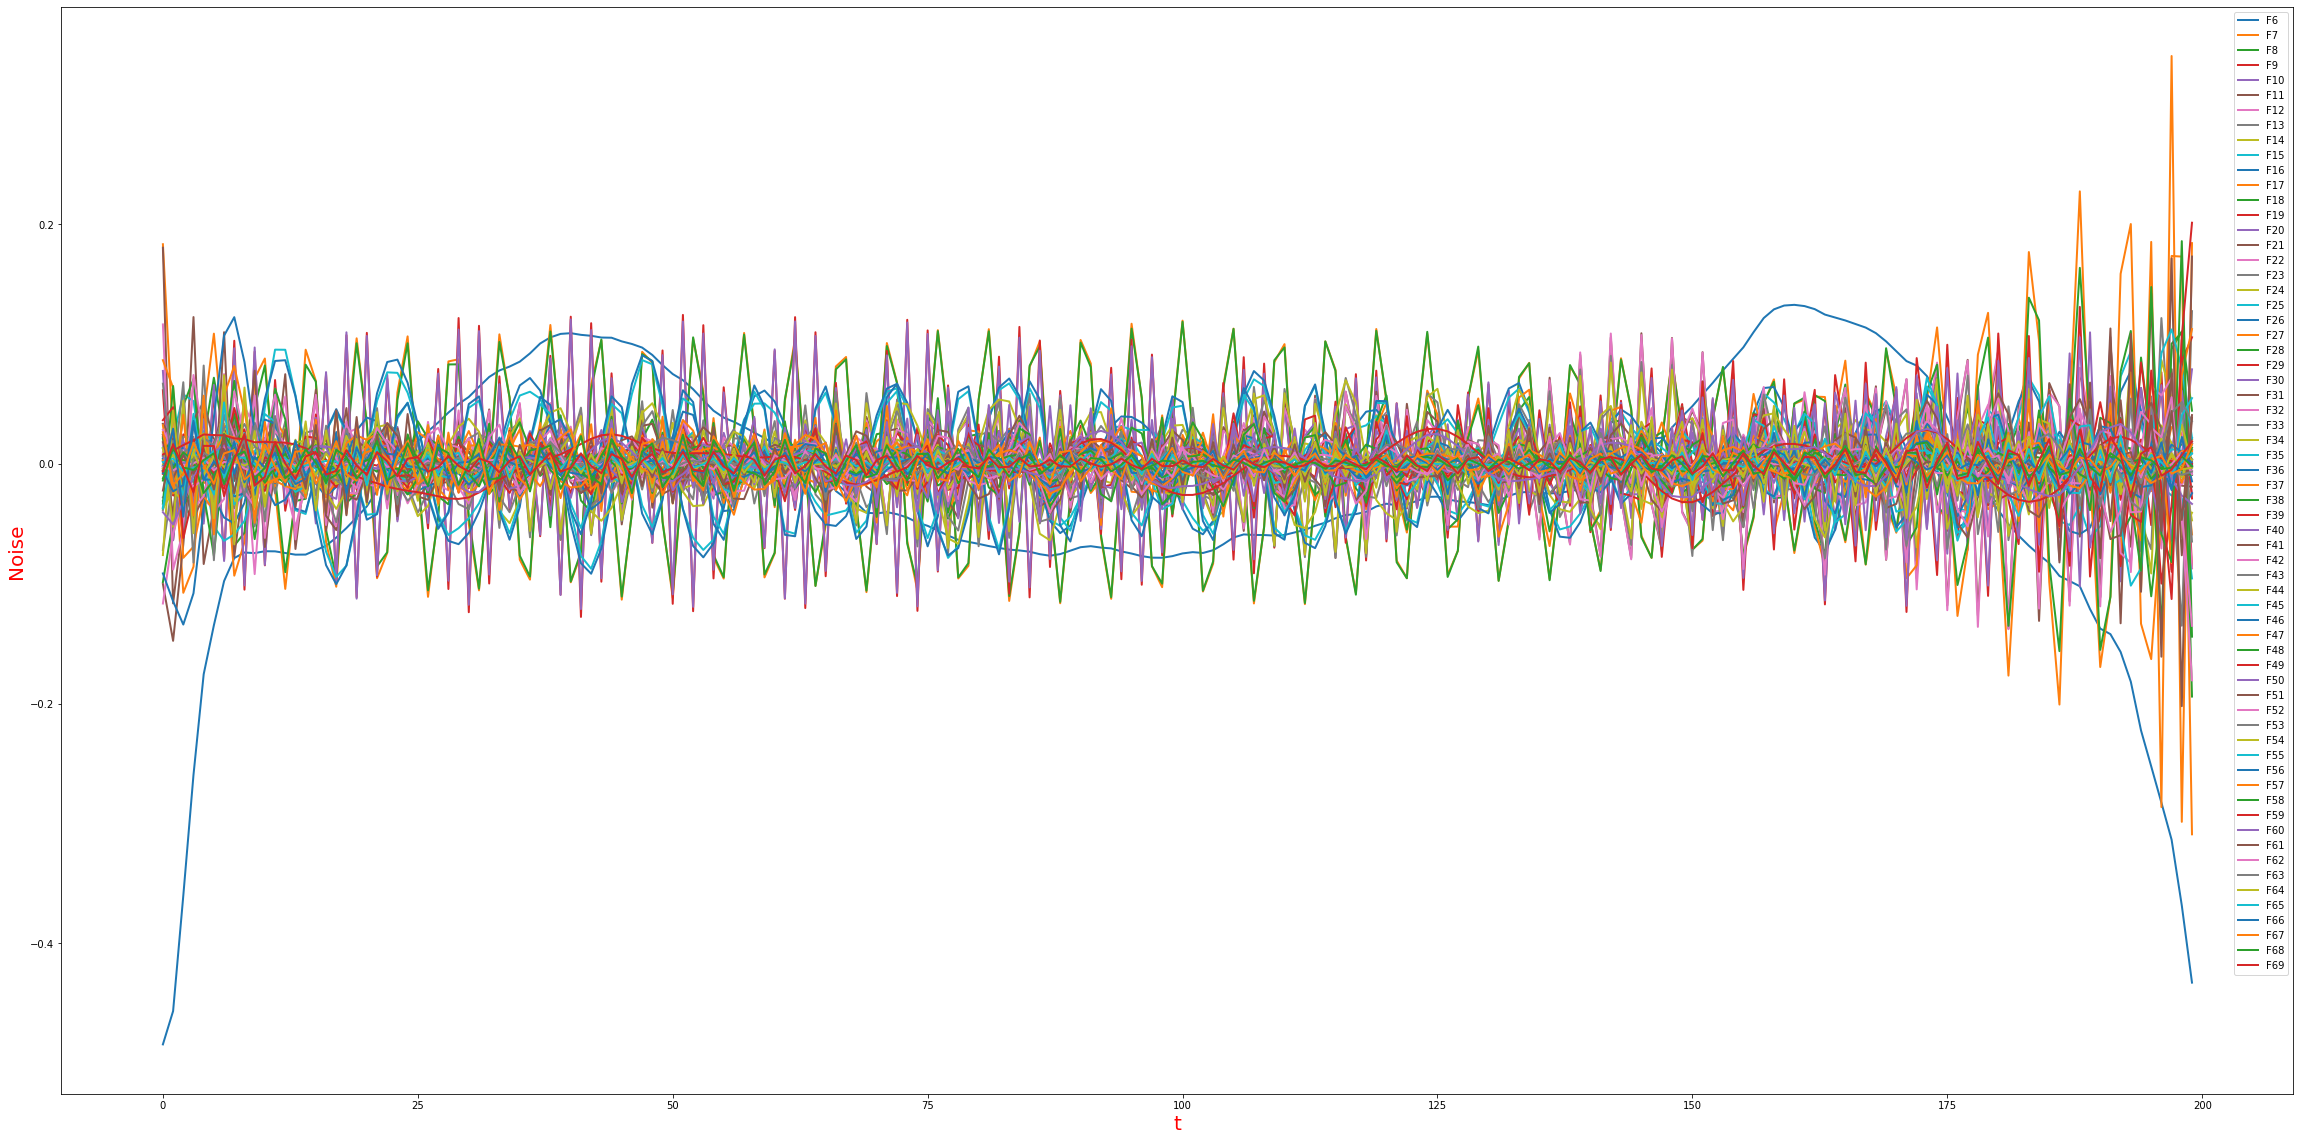

In [ ]:
#Noise
plt.figure(figsize= (40,20))
for i in range(6,len(s)):
  F_i = X_to_TS(X_elem[i])
  plt.plot(t, F_i, lw=2, label = f'F{i}')
  plt.xlabel("t", fontsize = 20, color = 'r')
  plt.ylabel("Noise", fontsize = 20, color = 'r')
plt.legend()

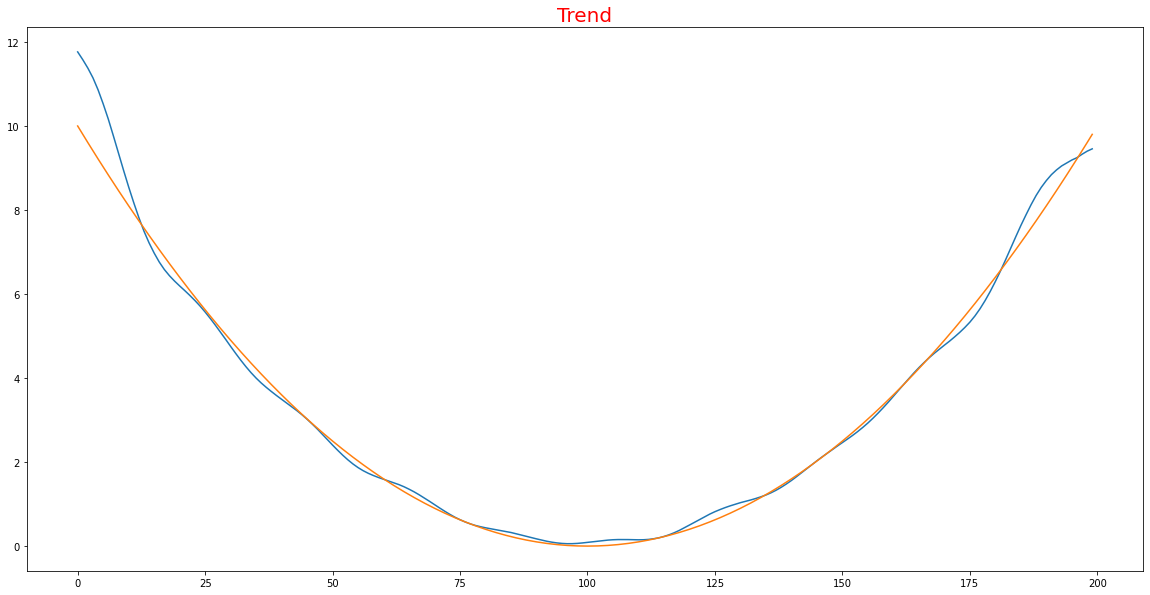

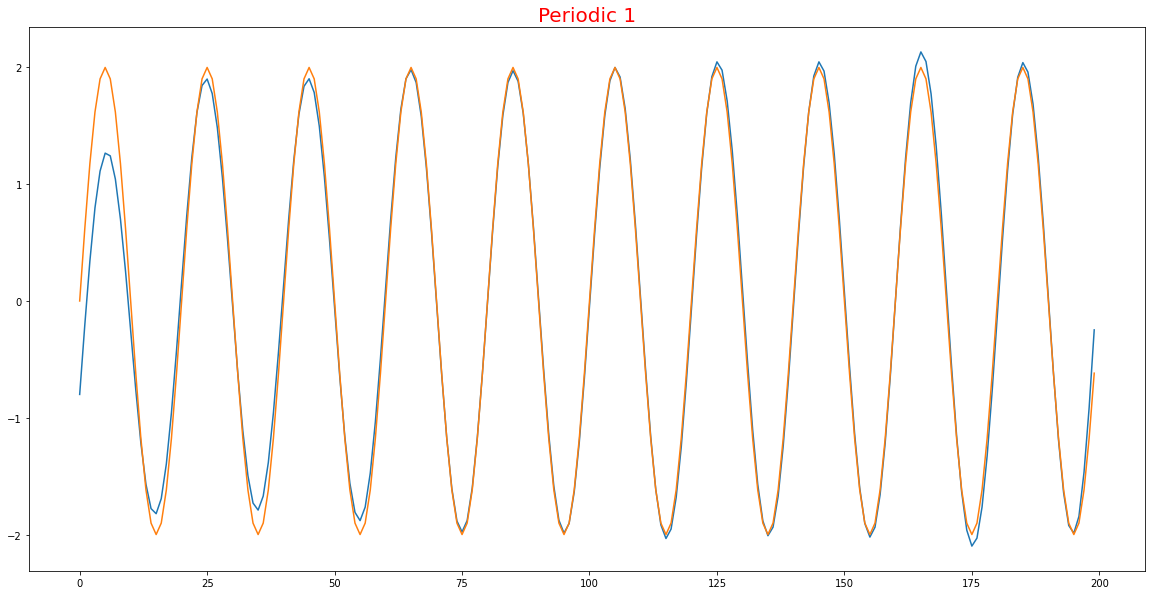

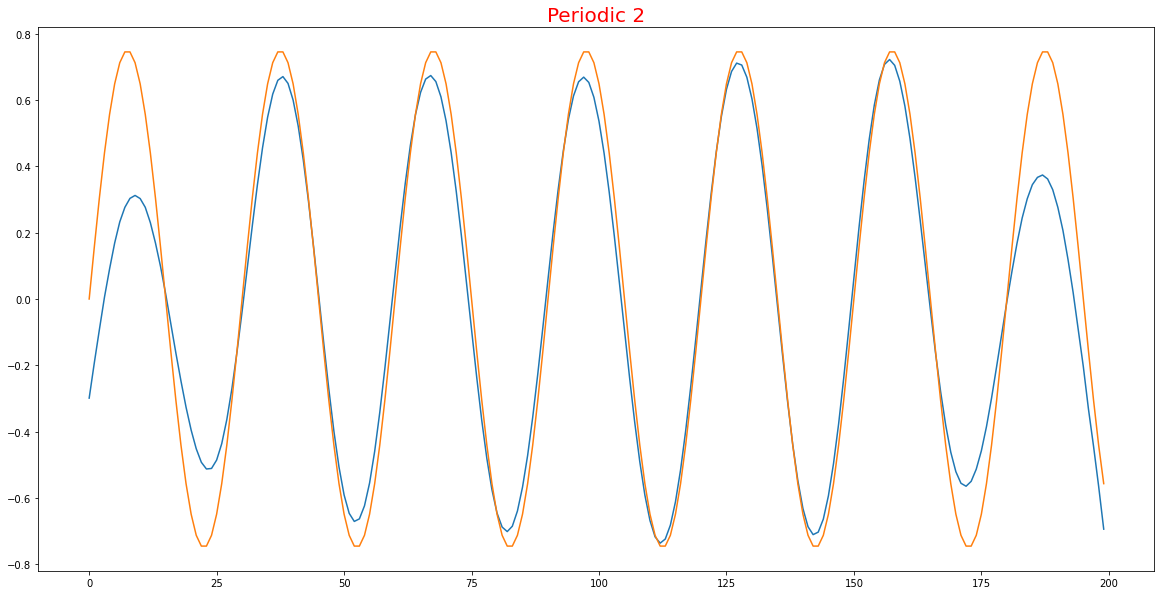

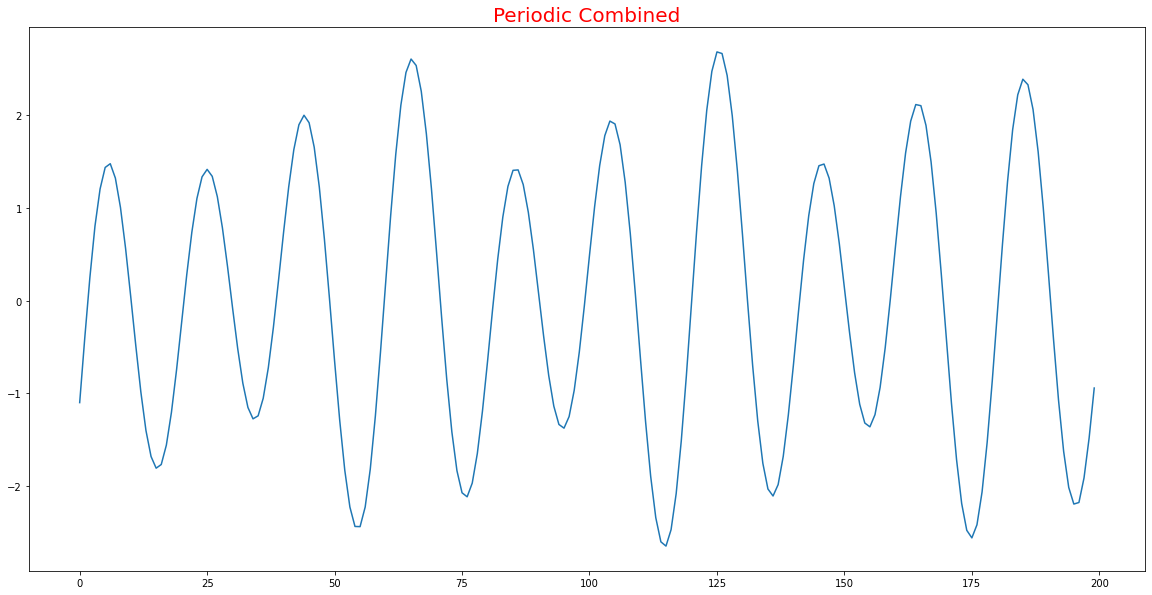

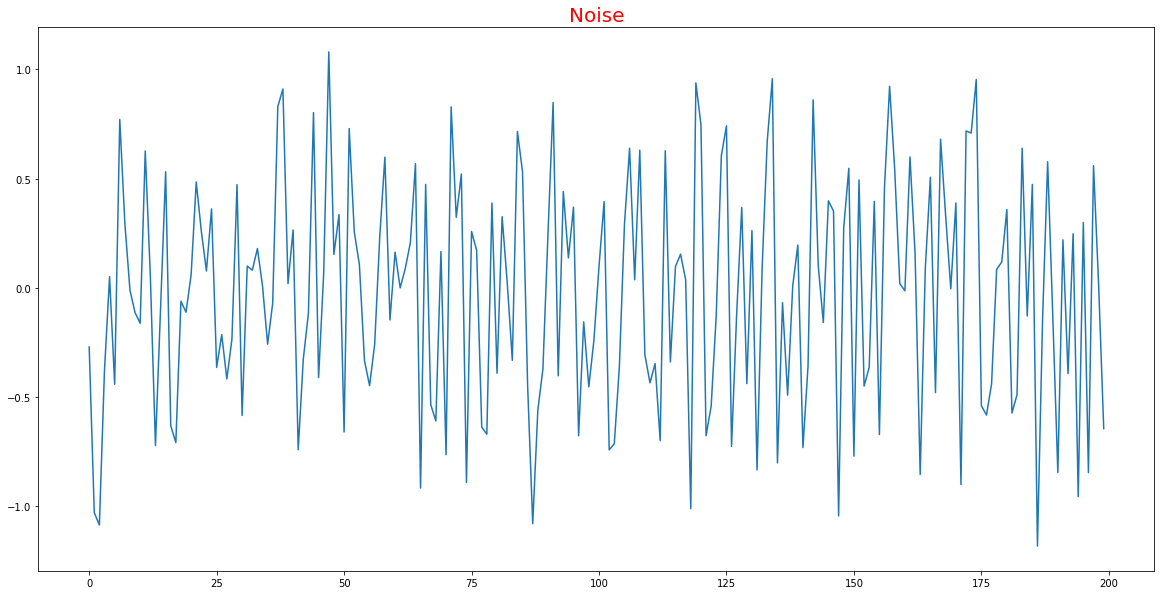

In [ ]:
F_trend = X_to_TS(X_elem[[0,1]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[2,3]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[4,5]].sum(axis=0))
F_noise = X_to_TS(X_elem[6:].sum(axis=0))
F_per = F_periodic1 + F_periodic2

#Plots of decompsed series
plt.figure(figsize=(20,10))
plt.plot(t, F_trend)
plt.title("Trend", fontsize = 20, color = 'Red')
plt.plot(t,trend, label="Trend")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t, F_periodic1)
plt.title("Periodic 1", fontsize = 20, color = 'Red')
plt.plot(t,periodic1)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t, F_periodic2)
plt.title("Periodic 2", fontsize = 20, color = 'Red')
plt.plot(t,periodic2)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t, F_per)
plt.title("Periodic Combined", fontsize = 20, color = 'Red')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t, F_noise)
plt.title("Noise", fontsize = 20, color = 'Red')
plt.show()

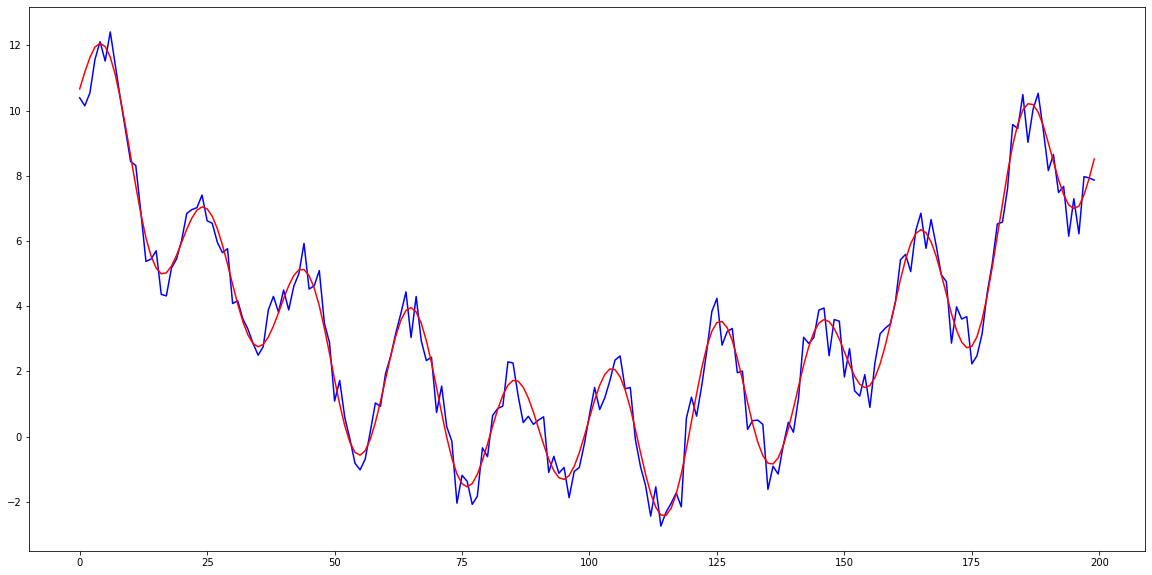

In [ ]:
F_12 = F_trend+F_per
plt.figure(figsize=(20,10))
# plt.plot(t, F_re,'red')
plt.plot(t, ts,'blue')

# F_12 = X_to_TS(X_elem[:12].sum(axis=0))
plt.plot(t,F_12 ,'red')